# cat & dogs Image Classification Model 
## 1. Import Modules 

In [1]:
import os
import glob
import random
os.environ['TF_CPP_MIN_LOG_LEVEL']='3'
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from utils import single_training_run
from utils import plot_single_training_run
from utils import hyperparameter_optimization_run
from utils import plot_hyperparameter_optimization_run

## 2. Data preparation and Inspection 
### 2.1 Data download 

In [2]:
training_data_path='../data/processed/train'
training_dogs=glob.glob(f'{training_data_path}/dog/dog.*')
training_cats=glob.glob(f'{training_data_path}/cat/cat.*')


### 2.2 Inspection 

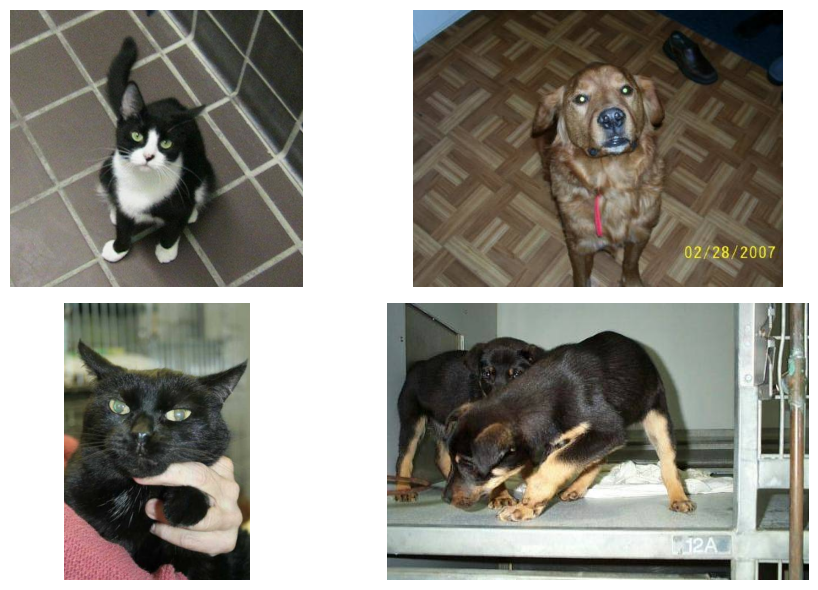

In [10]:
fig, axs = plt.subplots(2,2,figsize=(10, 6))

for cat, dog, row in zip(training_cats, training_dogs, axs):
    for animal, ax in zip([cat, dog], row):
        animal=image.load_img(animal)
        animal=image.img_to_array(animal)
        animal/=255.0
        ax.imshow(animal)
        ax.axis('off')

fig.tight_layout()

## EDA 
### 3.1 Image data 

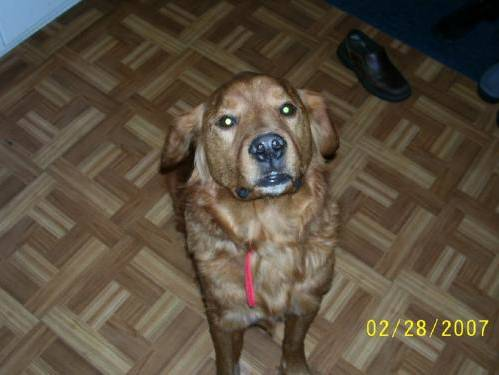

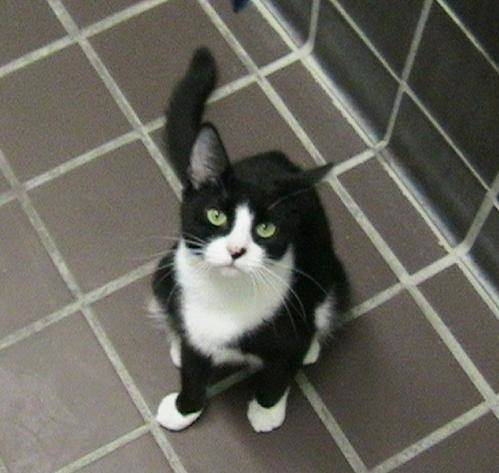

In [25]:
from PIL import Image
dog_img = Image.open(training_dogs[0])
cat_img = Image.open(training_cats[0])
dog_img.show()
cat_img.show()

- Show the images of the cat and dog being handled! 

In [29]:
dog=image.load_img(training_dogs[0])

dog=image.img_to_array(dog)# Take a look at some properties of the object
print(f'Image data is: {type(dog)}')
print(f'Image data shape: {dog.shape}')

Image data is: <class 'numpy.ndarray'>
Image data shape: (375, 499, 3)


- Investigating the first dog image and is now converted to a 
numpy array! 
- Array has a shape of 375x499x3 with 3 axes. Image has a pixel dimension of 375x499 while 3 is the three color channels. Below plot shows the 3 color channels of the image!  

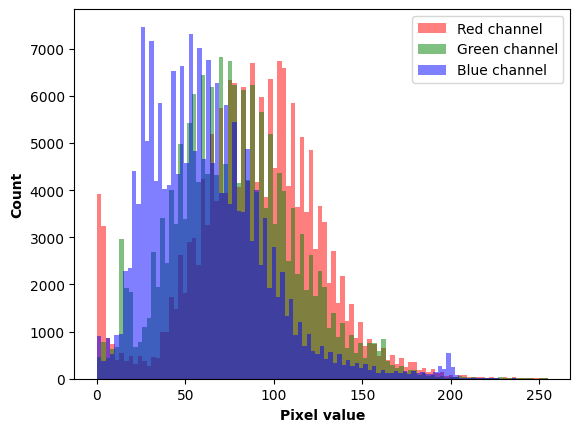

In [30]:
plt.hist(dog[:,:,0].flatten(), bins=100, color='red', alpha=0.5, label='Red channel')
plt.hist(dog[:,:,1].flatten(), bins=100, color='green', alpha=0.5, label='Green channel')
plt.hist(dog[:,:,2].flatten(), bins=100, color='blue', alpha=0.5, label='Blue channel')
plt.xlabel('Pixel value', fontweight='bold')
plt.ylabel('Count', fontweight='bold')
plt.legend(loc='best')
plt.show()

- Observations 
    1. 375x499x3 is around 561,375 individual values for the image above! There is more data per each image and needed scaling! 
    2. Range of pixel values are 0 to 255(256 values) and needs neural networks to handle this volume of data! 
    3. Scaling and converting imgaes to gray scale will relieve computation burden! 

### 3.2 Image dimensions

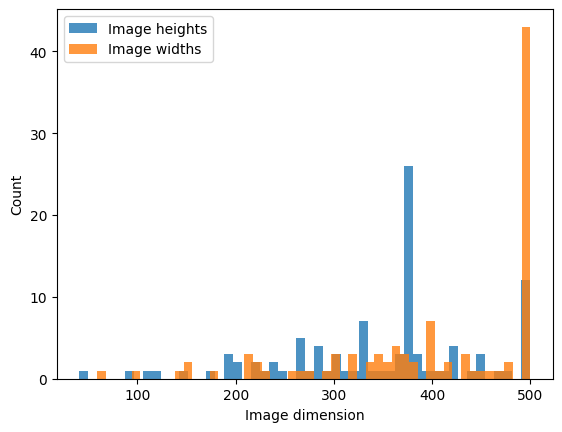

In [ ]:
sample_size=100
sample=random.sample(training_dogs, sample_size//2)
sample+=random.sample(training_cats, sample_size//2)

# Collectors for data
heights=[]
widths=[]

# Loop on the sample images
for sample_image in sample:

    # Load the image and convert it to an array
    sample_image=image.load_img(sample_image)
    sample_image=image.img_to_array(sample_image)

    # Get the width and height and add to collections
    heights.append(sample_image.shape[0])
    widths.append(sample_image.shape[1])

# Plot results as a histogram
plt.hist(heights, bins=50, alpha=0.6, label='Image heights')
plt.hist(widths, bins=50, alpha=0.6, label='Image widths')
plt.xlabel('Image dimension', fontweight='bold')
plt.ylabel('Count')
plt.legend(loc='best')
plt.show()